<a href="https://colab.research.google.com/github/hirajya/CCADMACL_EXERCISES_COM222-/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

Netflix is the world's largest online streaming service provider, with over 220 million subscribers. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscribers from ending their subscription.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

## Instructions

1. Your task is to group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other. Use Principal Component Analysis and any Clustering Algorithm.

2. After creating the clusters, profile each cluster that you have created.

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXERCISES/blob/353cd84703a9e313ee7ecf37fb97a067aa81ddbc/netflix.csv?raw=true")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
X = df.drop(columns=['show_id'])

In [7]:
categorical_cols = ['type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']
numerical_cols = ['release_year']

In [8]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [9]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [10]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [11]:
X_preprocessed = preprocessor.fit_transform(X)

1. Apply dimensionality reduction using Principal Component Analysis
- Use the necessary number of principal components

In [21]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_preprocessed)

print(f"Number of components: {pca.n_components_}")

Number of components: 10


2. Create a scree plot for each principal component

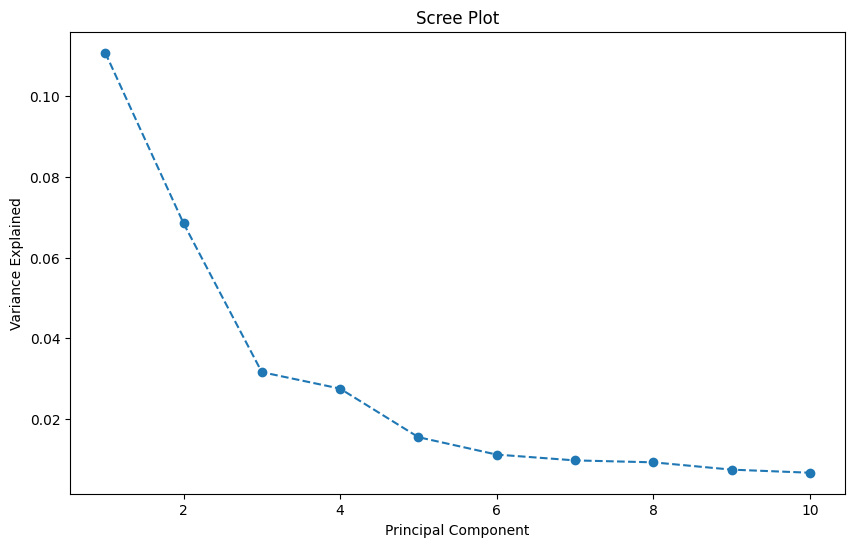

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [23]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_preprocessed)

print(f"Number of components: {pca.n_components_}")

Number of components: 3


3. Use any clustering algorithm to create clusters

In [24]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

df['cluster'] = clusters

4. Profile each cluster that you have generated based on your experiments

In [25]:
for cluster in range(5):
    print(f"Cluster {cluster}:")
    cluster_data = df[df['cluster'] == cluster]
    print(cluster_data.describe(include='all'))
    print("\n")

Cluster 0:
       show_id   type title                director         cast  \
count     2558   2558  2558                    2450         2325   
unique    2558      1  2558                    2066         2215   
top         s2  Movie  7:19  Raúl Campos, Jan Suter  Jeff Dunham   
freq         1   2558     1                      17            6   
mean       NaN    NaN   NaN                     NaN          NaN   
std        NaN    NaN   NaN                     NaN          NaN   
min        NaN    NaN   NaN                     NaN          NaN   
25%        NaN    NaN   NaN                     NaN          NaN   
50%        NaN    NaN   NaN                     NaN          NaN   
75%        NaN    NaN   NaN                     NaN          NaN   
max        NaN    NaN   NaN                     NaN          NaN   

              country     date_added  release_year rating duration  \
count            2392           2558   2558.000000   2553     2558   
unique            227           

In [34]:
def print_cluster_samples(count):
  for cluster in df['cluster'].unique():
    print(f"\nCluster {cluster} (Random Samples):")
    cluster_df = df[df['cluster'] == cluster]

    shuffled_cluster_df = cluster_df.sample(frac=1, random_state=42)

    print(shuffled_cluster_df.head(min(count, len(shuffled_cluster_df)))['title'])

print_cluster_samples(10)



Cluster 1 (Random Samples):
4700          Ouran High School Host Club
2249               Four Seasons in Havana
6695                   The Naked Director
2712                         Herrens veje
6402                         The Good Cop
1299                          Cheer Squad
4575                           Off Camera
516                          Angel Beats!
3631                        Life Sentence
4938    Power Rangers Operation Overdrive
Name: title, dtype: object

Cluster 0 (Random Samples):
7463                                            Wakefield
2690                                   Hell or High Water
6111                            The Ballad of Lefty Brown
1360                         Christina P: Mother Inferior
2115                                                Farce
4990    Prosecuting Evil: The Extraordinary World of B...
7652                                               Wolves
444                                                  Amar
3204                           

# Cluster Analysis of Movies

The following are the possible themes for each cluster based on the titles within them:

## Summary of Clusters:

| Cluster | Possible Theme                           |
|---------|------------------------------------------|
| **1**   | School Life, Romance, Drama, Crime      |
| **0**   | Thriller, Crime, Westerns, Dark Comedy  |
| **2**   | Mystery, History, Adventure             |
| **4**   | Comedy, Romance, Satire                 |
| **3**   | Historical Events, Biographies, Social Issues |
